# Semillero GCPDS
# Database 7. Two-finger gameplay with deliberately failing controller (007-2014)
# Brandon Lotero Londoño



[Data Sets](http://bnci-horizon-2020.eu/database/data-sets)

[Decoding auditory attention to instruments in polyphonic music using single-trial EEG classification](https://www.researchgate.net/publication/260645363_Decoding_auditory_attention_to_instruments_in_polyphonic_music_using_single-trial_EEG_classification)



[Epoch MNE tutorial](https://mne.tools/dev/auto_tutorials/simulation/plot_creating_data_structures.html?highlight=scratch)


[Plotting topographic maps of evoked data](https://mne.tools/dev/auto_examples/visualization/plot_evoked_topomap.html#sphx-glr-auto-examples-visualization-plot-evoked-topomap-py)


[Visualizing epoched data¶](https://mne.tools/stable/auto_tutorials/epochs/plot_20_visualize_epochs.html#sphx-glr-auto-tutorials-epochs-plot-20-visualize-epochs-py)



*The Affective Pacman (AffPac) dataset was collected to study the effect of mental state on brain-computer interface classifiers.* 

*For the experiment, users were asked to play a variant of the Pacman game,
where buttons pressed with the left and right index finger turned an constantly
moving Pacman character 90 degrees left or right, in order to navigate through the maze. Periodically, the user input was randomly ignored to induce a reduction of control, combined with lagging game play. This resulted in a change in the emotional state of the user, as repeatedly measured with Likert scales on the dimensions valence, arousal and dominance.*


In [ ]:
#Montaje en drive 
from google.colab import drive
import requests
drive.mount('/content/gdrive')
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.utils.git

Mounted at /content/gdrive
  Cloning https://github.com/UN-GCPDS/python-gcpds.utils.git to /tmp/pip-req-build-kskiybb3
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-kskiybb3
     |████████████████████████████████| 6.9MB 4.4MB/s 
  Created wheel for gcpds-utils: filename=gcpds_utils-0.1a3-cp36-none-any.whl size=96836 sha256=781ba803046756bfefd209d912a221ae78dbe5e5d0d8ffd0c87c396693bf2cd9
  Stored in directory: /tmp/pip-ephem-wheel-cache-80tda8kk/wheels/ab/4a/1e/d215a31a12c0fa202a9bccc9b9d68874deb08dfdce8b7d43c8
Successfully built gcpds-utils


In [ ]:
cd '/content/gdrive/Shared drives/GCPDS - semillero/databases/affective_pacman'

/content/gdrive/Shared drives/GCPDS - semillero/databases/affective_pacman


In [ ]:
#DESCARGA DE LOS DATASETS A LA CARPETA DE DRIVE, SÓLO REQUIERE EJECUTARSE UNA VEZ:

#for i in (0,1,2,4,5,6,7,9):
#  url = f'http://bnci-horizon-2020.eu/database/data-sets/007-2014/S0{i}.mat'
#  r = requests.get(url, allow_redirects=True)
#  open(f'S0{i}.mat', 'wb').write(r.content)

#for i in (10,11):
#  url = f'http://bnci-horizon-2020.eu/database/data-sets/007-2014/S{i}.mat'
#  r = requests.get(url, allow_redirects=True)
#  open(f'S0{i}.mat', 'wb').write(r.content)




In [ ]:
#Librerías y datos de cada sujeto
!pip install mne
import mne
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from ipywidgets import interact_manual

S1 = loadmat(f"S01")
S2 = loadmat(f"S02")
S4 = loadmat(f"S04")
S5 = loadmat(f"S05")
S6 = loadmat(f"S06")
S7 = loadmat(f"S07")
S9 = loadmat(f"S09")
S10 = loadmat(f"S010")
S11 = loadmat(f"S011")

## Visualización de las condiciones del sujeto durante la sesión

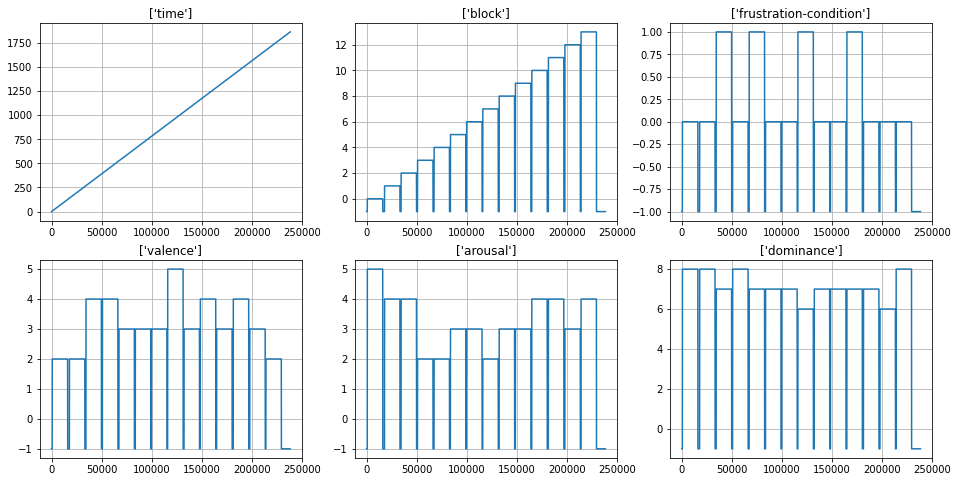

In [ ]:
plt.figure(figsize=(16,8))
for i in range (0,6):
  plt.subplot(2,3,i+1)
  plt.plot(S1['I'][i])
  plt.title(S1['id_lab'][0][i])  
  plt.grid()

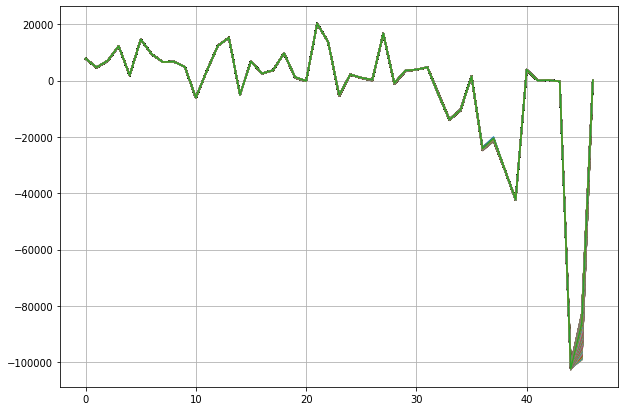

In [ ]:
#PLOT DE CANALES

test=S1['X'][:,0:1023]
plt.figure(figsize=(10,7))
plt.plot(test)
plt.grid()
plt.show()


## Obtención de los coeficientes de correlacióón 

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array(['GSR2'], dtype='<U4')

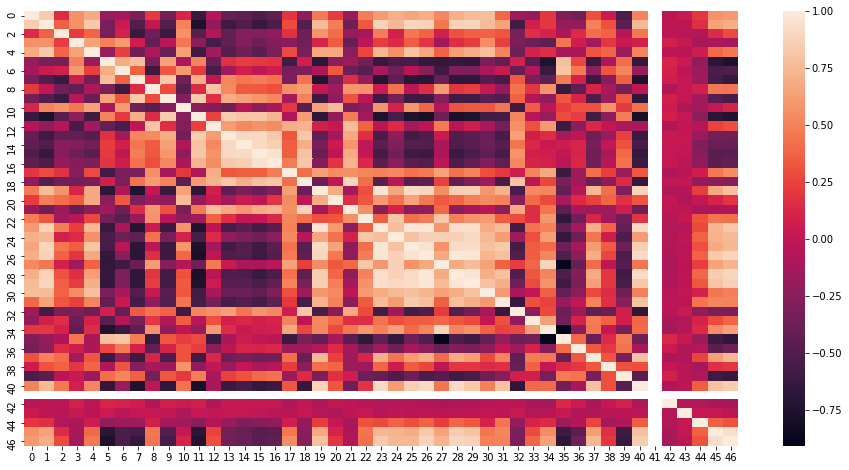

In [ ]:
plt.figure(figsize=(16,8))
hm=sn.heatmap(np.corrcoef(test), annot=False, fmt='g')
S1['chann'][0][41]

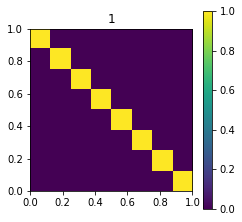

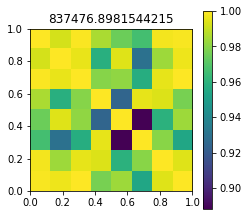

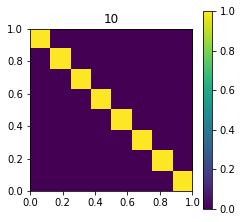

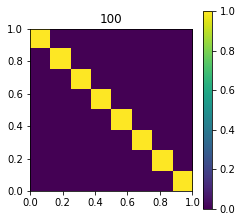

(47, 1023)

In [ ]:

from scipy.spatial.distance import pdist

def gausker(x1,x2,sigma):
    dist = np.linalg.norm(x1-x2)
    return np.exp(-dist**2/(2.*(sigma**2.)))


s = np.std(pdist(test))
m=1
for sigma in [1, s, 10, 100]:
    gaus = np.zeros((8,8))
    for ii in range(8):
        for jj in range(8):
            gaus[ii,jj] = gausker(test[ii,:],test[jj,:],sigma)
    plt.figure(figsize=(8,8))
    plt.subplot(2,2,m)
    plt.imshow(gaus,extent=[0, 1, 0, 1])
    plt.colorbar()
    plt.title(str(sigma))
    plt.show()
    m=m+1
test.shape

In [ ]:
def gauss_norm(x1,x2,sigma): 
    dist = np.linalg.norm(x1-x2)
    return np.exp(-dist**2/(2.*(sigma**2.)))

array([array(['EXG5'], dtype='<U4'), array(['EXG6'], dtype='<U4'),
       array(['EXG7'], dtype='<U4')], dtype=object)

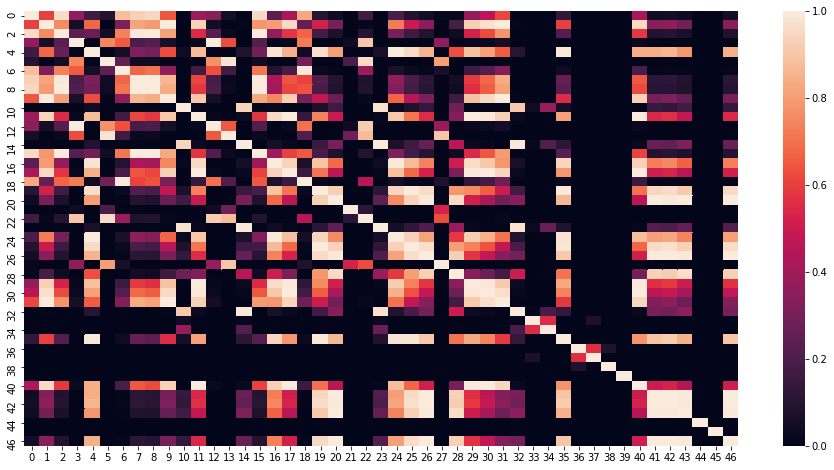

In [ ]:
M=np.zeros((47,47))
for i in range (47):
  for j in range(47):
    M[i,j]=gauss_norm(test[i],test[j],100000)

plt.figure(figsize=(16,8))
hm=sn.heatmap(M, annot=False, fmt='g')
S1['chann'][0,36:39]

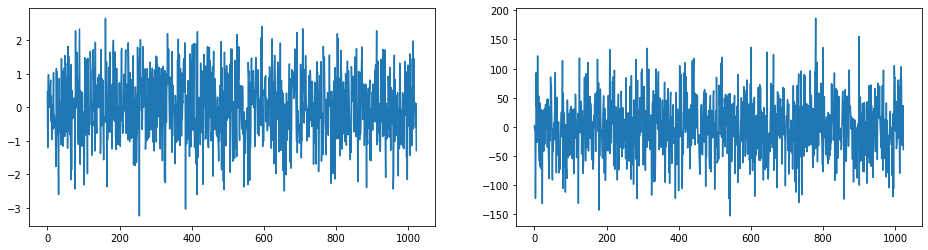

In [ ]:
z1=np.random.randn(1024)
z2=50*np.random.randn(1024)
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(z1)
plt.subplot(1,2,2)
plt.plot(z2)

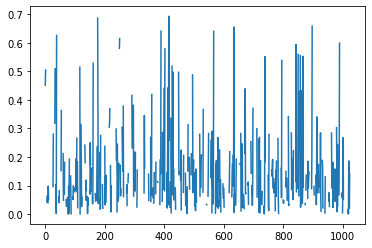

In [ ]:
from scipy.stats import entropy

plt.plot(entropy([z1,z2]))


[array(['EXG5'], dtype='<U4') array(['EXG6'], dtype='<U4')
 array(['EXG7'], dtype='<U4')]
[array(['Resp'], dtype='<U4')]


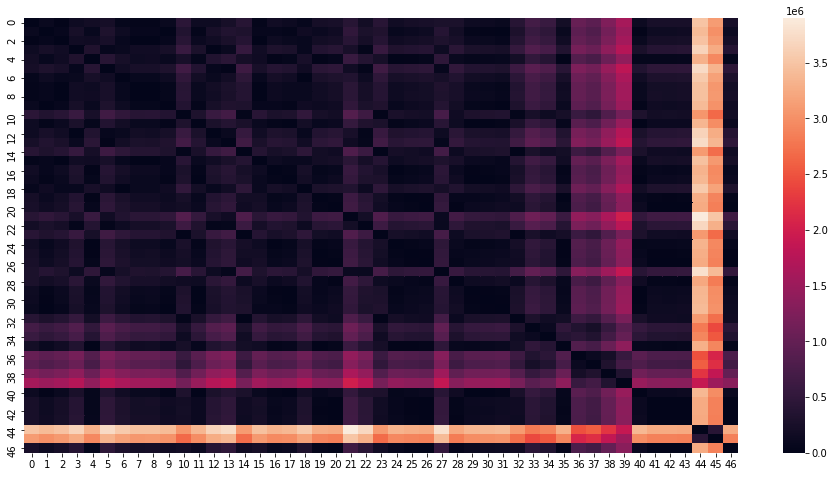

In [ ]:
M_euc=np.zeros((47,47))
for i in range (47):
  for j in range(47):
    M_euc[i,j]=np.linalg.norm(test[i]-test[j])

plt.figure(figsize=(16,8))
hm=sn.heatmap(M_euc, annot=False, fmt='g')
print(S1['chann'][0,36:39])
print(S2['chann'][0,44:45])

In [ ]:
pip install pyitlib


  Created wheel for pyitlib: filename=pyitlib-0.2.2-cp36-none-any.whl size=28503 sha256=4bec6531ed047f352c0a520b4746393e4f703a5588589f5cd5a67befd1307a09
  Stored in directory: /root/.cache/pip/wheels/1c/f8/41/f4b4e777dd6ea714f2c4900367fb479e9fca0eb000c46e73f3
Successfully built pyitlib


In [ ]:
from pyitlib import discrete_random_variable as drv

In [ ]:
drv.entropy(test[0])

array(9.98881526)

array([array(['EXG5'], dtype='<U4'), array(['EXG6'], dtype='<U4'),
       array(['EXG7'], dtype='<U4')], dtype=object)

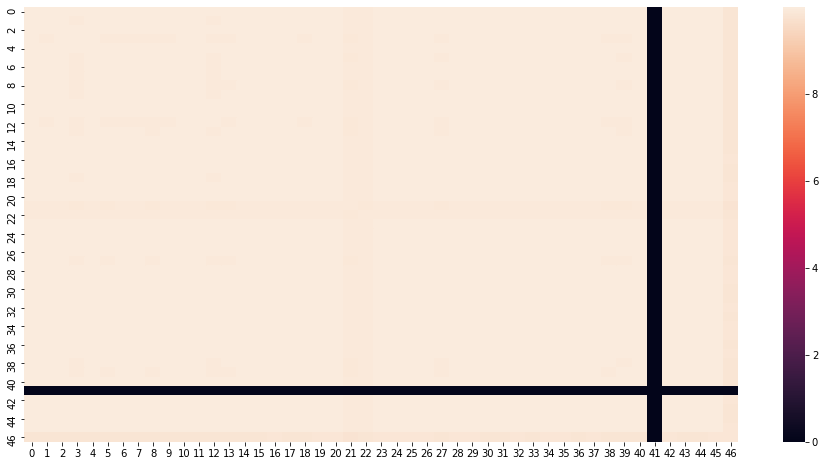

In [ ]:
mut=drv.information_mutual(test)
plt.figure(figsize=(16,8))
hm=sn.heatmap(mut, annot=False, fmt='g')
S1['chann'][0,36:39]

array([array(['EXG5'], dtype='<U4'), array(['EXG6'], dtype='<U4'),
       array(['EXG7'], dtype='<U4')], dtype=object)

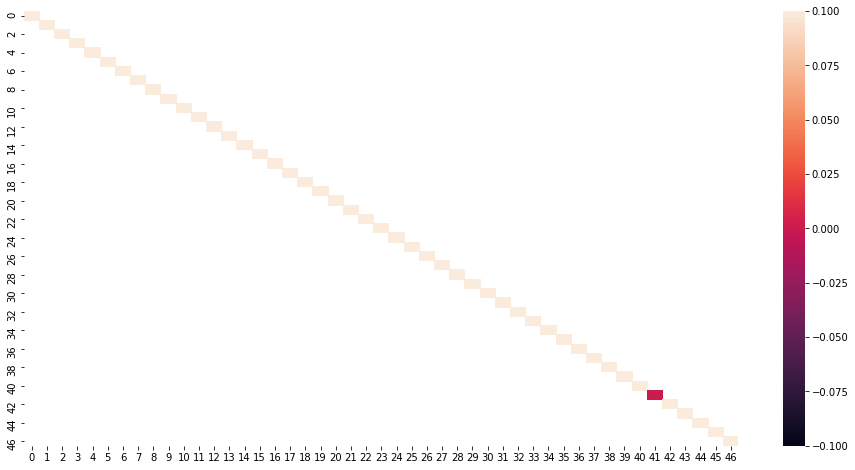

In [ ]:
cross=drv.entropy_cross(test)
plt.figure(figsize=(16,8))
hm=sn.heatmap(cross, annot=False, fmt='g')
S1['chann'][0,36:39]

In [ ]:
cross

array([[9.98881526,        inf,        inf, ...,        inf,        inf,
               inf],
       [       inf, 9.98490519,        inf, ...,        inf,        inf,
               inf],
       [       inf,        inf, 9.99468036, ...,        inf,        inf,
               inf],
       ...,
       [       inf,        inf,        inf, ..., 9.99272533,        inf,
               inf],
       [       inf,        inf,        inf, ...,        inf, 9.9966354 ,
               inf],
       [       inf,        inf,        inf, ...,        inf,        inf,
        9.84510113]])

In [ ]:
def KLT(a):
    """
    Returns Karhunen Loeve Transform of the input and the transformation matrix and eigenval
    
    Ex:
    import numpy as np
    a  = np.array([[1,2,4],[2,3,10]])
    
    kk,m = KLT(a)
    print kk
    print m
    
    # to check, the following should return the original a
    print np.dot(kk.T,m).T
        
    """
    val,vec = np.linalg.eig(np.cov(a))
    klt = np.dot(vec,a)
    return klt,vec,val

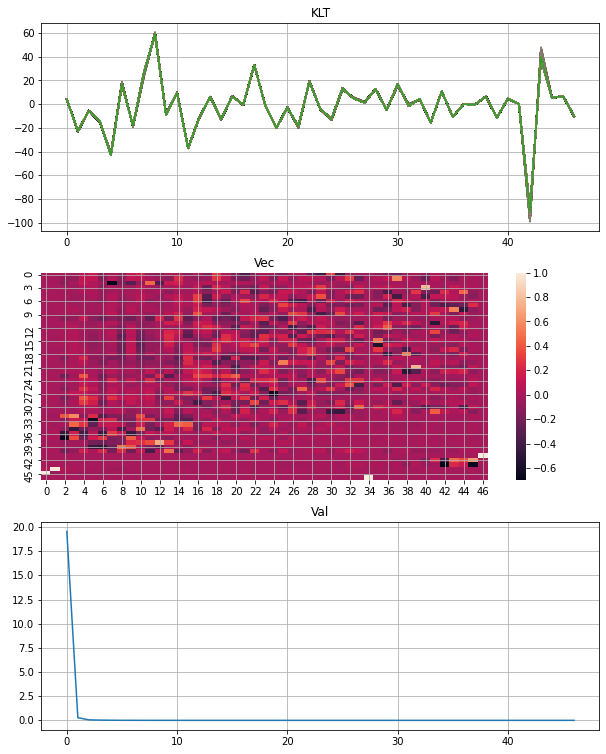

In [ ]:
YY=KLT(test)
plt.figure(figsize=(10,13))
plt.title('Karhuen Loeve Transform')


plt.subplot(311)
plt.plot(YY[0]/1023)
plt.grid()
plt.title('KLT')


plt.subplot(312)
sn.heatmap(YY[1], annot=False, fmt='g')
plt.grid()
plt.title('Vec')


plt.subplot(313)
plt.plot(YY[2]/1023**2)
plt.grid()
plt.title('Val')

plt.show()


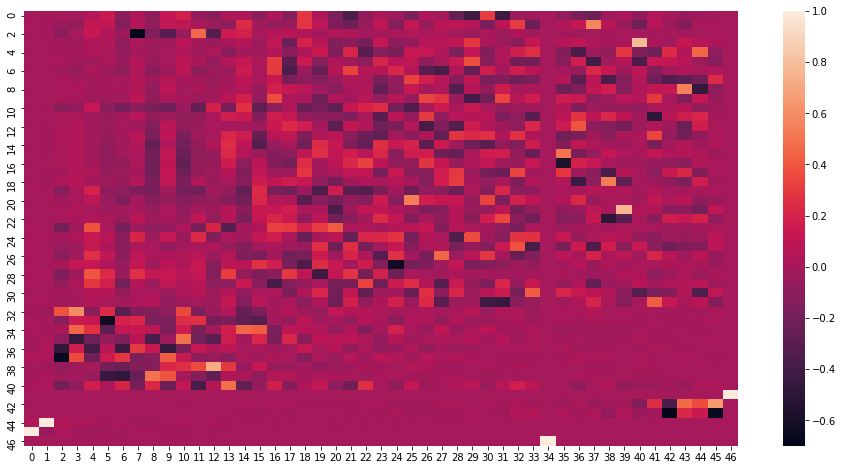

In [ ]:
mut=drv.information_mutual(test)
plt.figure(figsize=(16,8))
hm=sn.heatmap(YY[1], annot=False, fmt='g')

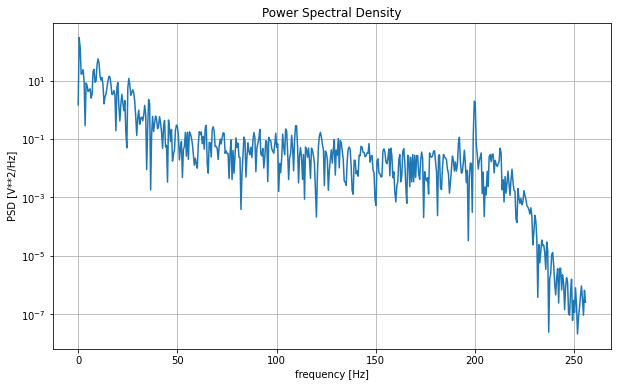

In [ ]:
from scipy import signal
f, Pxx_den = signal.welch(test[0], 512, nperseg=1023)
plt.figure(figsize=(10,6))
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.title('Power Spectral Density')
plt.show()

In [ ]:
from scipy.fftpack import fft, ifft, fftfreq, fftshift


def fourier_series(signal):
  TTT = fftshift(fft(signal)/signal.shape[1]**2)
  omega=fftshift(fftfreq(TTT.shape[0], 1/512))

  plt.figure(figsize=(10,7))
  plt.plot(np.abs(TTT))
  plt.xlim(-32,32)
  plt.grid()
  plt.xlabel('$\omega$')
  plt.ylabel('Magnitude')
  plt.title('Cn')
  plt.show()
  x=np.zeros(47)
  y=np.zeros(47)
  for i in range (0,signal.shape[0]):
    x[i]= np.abs(np.mean(TTT[i]))
    y[i]=np.var(TTT[i])
  plt.figure()
  plt.stem(x)
  plt.stem(y)

  return (TTT,x,y)


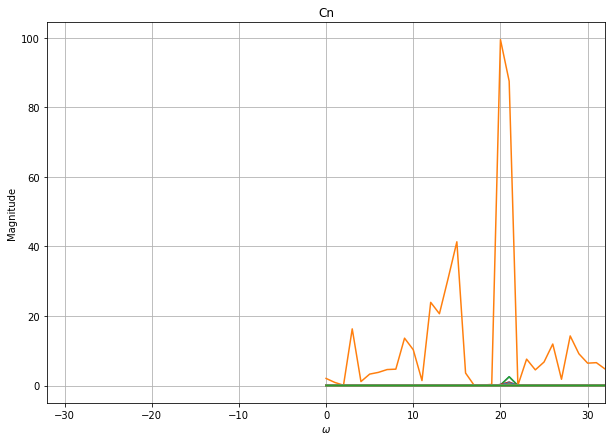

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


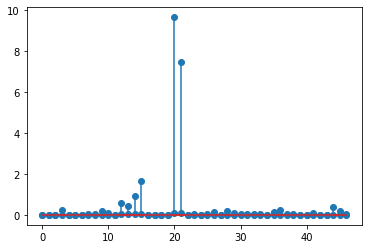

In [ ]:
FULL,means,var=fourier_series(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

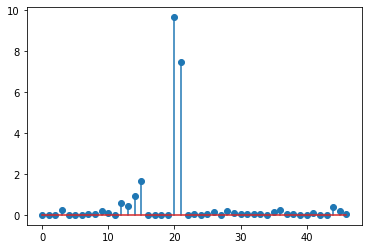

In [ ]:
plt.stem(var)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

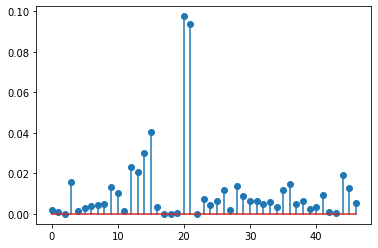

In [ ]:
plt.stem(means)

<function matplotlib.pyplot.show>

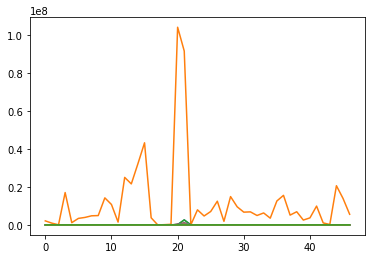

In [ ]:
plt.figure()
plt.plot(np.abs(fftshift(fft(test))))
plt.show

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


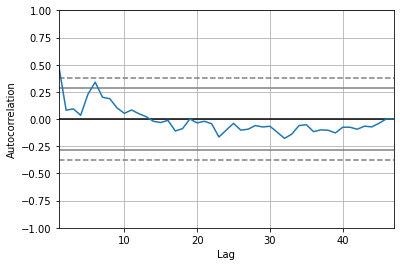

In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
autocorrelation_plot(test)


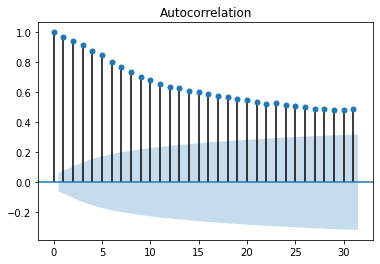

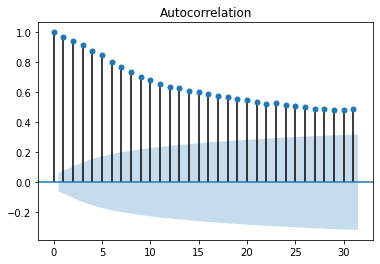

In [ ]:
plot_acf(test[0])

In [ ]:
#!pip install git+https://github.com/statsmodels/statsmodels

from pandas import read_csv
#from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt




"""
def Auto_regression(data,desp,lags):
  # split dataset
  X = data
  train, test_ = X[1:len(X)-desp], X[len(X)-desp:]
  # train autoregression
  model = AutoReg(train, lags=25)
  model_fit = model.fit()
  #print('Coefficients: %s' % model_fit.params)
  # make predictions
  predictions = model_fit.predict(start=len(train), end=len(train)+len(test_)-1, dynamic=False)
  #for i in range(len(predictions)):
  #	print('predicted=%f, expected=%f' % (predictions[i], test_[i]))
  rmse = sqrt(mean_squared_error(test_, predictions))
  #print('Test RMSE: %.3f' % rmse)
  # plot results
  plt.figure(figsize=(10,7))
  plt.plot(test_)
  plt.plot(predictions, color='red')  
  plt.grid()
  plt.show()
"""

"\ndef Auto_regression(data,desp,lags):\n  # split dataset\n  X = data\n  train, test_ = X[1:len(X)-desp], X[len(X)-desp:]\n  # train autoregression\n  model = AutoReg(train, lags=25)\n  model_fit = model.fit()\n  #print('Coefficients: %s' % model_fit.params)\n  # make predictions\n  predictions = model_fit.predict(start=len(train), end=len(train)+len(test_)-1, dynamic=False)\n  #for i in range(len(predictions)):\n  #\tprint('predicted=%f, expected=%f' % (predictions[i], test_[i]))\n  rmse = sqrt(mean_squared_error(test_, predictions))\n  #print('Test RMSE: %.3f' % rmse)\n  # plot results\n  plt.figure(figsize=(10,7))\n  plt.plot(test_)\n  plt.plot(predictions, color='red')  \n  plt.grid()\n  plt.show()\n"

In [ ]:
#Auto_regression(test[0],25,25)

In [ ]:
#Auto_regression(np.concatenate((test[0],test[1])),25,25)

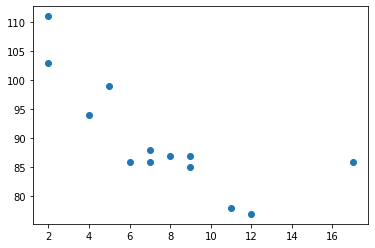

In [ ]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show() 

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

from ipywidgets import interact
@interact(m=(-2,2,0.1))
def scatter(m=1):
  x = np.random.randn(512)
  y = m*x+np.random.randn(512)

  slope, intercept, r, p, std_err = stats.linregress(x, y)

  def myfunc(x):
    return slope * x + intercept

  mymodel = list(map(myfunc, x))

  plt.scatter(x, y,color='purple')
  plt.plot(x, mymodel,color='red')
  plt.grid()
  plt.show() 

interactive(children=(FloatSlider(value=1.0, description='m', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

In [ ]:
pip install git+https://github.com/raphaelvallat/entropy.git 


  Cloning https://github.com/raphaelvallat/entropy.git to /tmp/pip-req-build-1pgu3y7d
  Running command git clone -q https://github.com/raphaelvallat/entropy.git /tmp/pip-req-build-1pgu3y7d
  Created wheel for entropy: filename=entropy-0.1.2-cp36-none-any.whl size=15612 sha256=d46d883c8cf572a6fc729b04d94f6f33bc41b4382f1abd804611933841c34614
  Stored in directory: /tmp/pip-ephem-wheel-cache-cdqe6rqj/wheels/60/ed/d3/b715e38438f1f39edb1383aea79c578073953b25fa576fc71e
Successfully built entropy


In [ ]:
from scipy import signal

sos = signal.butter(3, (8,12), 'bp', fs=512, output='sos')
filtered = signal.sosfilt(sos, test)

In [ ]:
from entropy import spectral_entropy
entropy_=np.zeros(47)

for i in range (0,47):
  entropy_[i]=spectral_entropy(test[i], 512, method='fft')

/usr/local/lib/python3.6/dist-packages/entropy/entropy.py:179: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


In [ ]:
entropy_[41]=0

In [ ]:
def power(array):
  n=array.shape[0]
  size=array.shape[1]
  pow=np.zeros(n)
  for i in range (0,n):
    tran=array[i]**2
    pow[i]=np.sum(tran)/size**2
  return pow

def lin_power(array):
  n=array.shape[0]
  size=array.shape[1]
  pow=np.zeros(n)
  for i in range (0,n):    
    pow[i]=np.linalg.norm(array[i])/size
  return pow


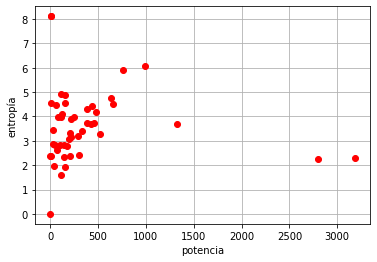

In [ ]:
power_lin=lin_power(test)
power_=power(test)
plt.plot(power_lin,entropy_,'o',color='red')
plt.grid()
plt.xlabel('potencia')
plt.ylabel('entropía')

plt.show()

In [ ]:
np.corrcoef(entropy_,power_)

array([[ 1.        , -0.15504336],
       [-0.15504336,  1.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression

def lin_reg(x,y,xlab='x',ylab='y'):
  regressor = LinearRegression()
  regressor.fit(x.reshape(-1,1),y.reshape(-1,1))
  regressor.score(x.reshape(-1,1),y.reshape(-1,1))
  print(regressor.get_params())
  print(regressor.coef_)

  ypred = regressor.predict(x.reshape(-1,1))
  plt.figure()
  plt.plot(x,ypred)
  plt.scatter(x,y)
  plt.grid()
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.show()
  

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
[[0.00163854]]


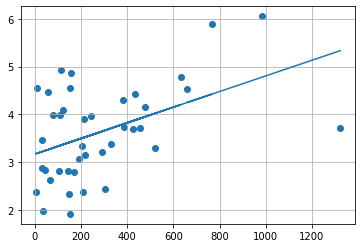

In [ ]:
u=lin_reg(power_lin[0:40],entropy_[0:40],'','')

In [ ]:
from scipy import stats


#Spearman and Pearson
print(stats.spearmanr(power_lin[0:40],entropy_[0:40]))
print("")
print(stats.pearsonr(power_lin[0:40],entropy_[0:40]))
#print(np.corrcoef(power_lin/np.var(power_lin),entropy_/np.var(power_lin)))

SpearmanrResult(correlation=0.3570356472795498, pvalue=0.0237218610328916)

(0.4635185010579259, 0.002593074823440691)


In [ ]:
#Normal test
print(stats.normaltest(power_lin))
print(stats.normaltest(entropy_))

NormaltestResult(statistic=59.986829166476596, pvalue=9.419450171495343e-14)
NormaltestResult(statistic=12.584216169321696, pvalue=0.0018508540742635136)


In [ ]:
#Kendall
print(stats.kendalltau(power_,entropy_))

KendalltauResult(correlation=0.14153561517113786, pvalue=0.16059317014559282)


In [ ]:
#Chi2
entropy_[41]=power_[41]=0.2

stat, p, dof, expected = stats.chi2_contingency(power_,entropy_)
print(p)
print(stat)
print(dof)

1.0
0.0
0


#CALCULAR P VALUE POR APARTE

In [ ]:
#PSEUDO TRIALS

supreme=S1['X'][:,0:120000]
supreme=supreme.reshape(30,47,4000)


supreme2=S2['X'][:,0:120000]
supreme2=supreme.reshape(30,47,4000)

supreme.shape

(30, 47, 4000)

(30, 47)

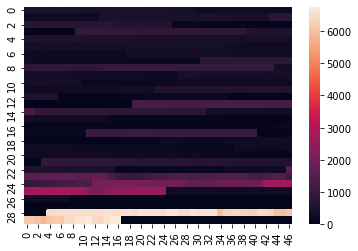

In [ ]:
trial_power=np.linalg.norm(supreme,axis=2)/1000
hmm=sn.heatmap(trial_power, annot=False, fmt='g')
trial_power.shape

In [ ]:
entropy_vector=np.zeros((30,47))
for i in range (0,30):  
  for j in range(0,47):
    entropy_vector[i,j]=spectral_entropy(supreme[i,j],512, method='fft')
    if np.isnan(entropy_vector[i,j]):
      entropy_vector[i,j]=0

entropy_vector.shape

/usr/local/lib/python3.6/dist-packages/entropy/entropy.py:179: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


(30, 47)

In [ ]:
entropy_vector

array([[ 2.69329143,  1.51816869,  2.07646227, ...,  2.50543666,
         3.19935203,  3.12113619],
       [ 3.26921773,  2.64482999,  2.10015869, ...,  2.63781953,
         1.8956002 ,  3.71714783],
       [ 2.64020658,  2.59422946,  2.73854709, ...,  3.51558137,
         2.89893603,  2.70024824],
       ...,
       [10.09591484, 10.08296299, 10.12520695, ..., 10.11796188,
        10.10616207, 10.15120697],
       [10.13318443, 10.06011963, 10.11641312, ...,  3.45025754,
         2.65389299,  3.44749689],
       [ 3.12785673,  2.78935504,  3.3682816 , ...,  2.76870751,
         1.75358546,  1.35521603]])

In [ ]:
"""
lin_reg(entropy_,entropy_vector[0],'Mean Entropy','Entropy')
print(stats.kendalltau(entropy_,entropy_vector))
"""

"\nlin_reg(entropy_,entropy_vector[0],'Mean Entropy','Entropy')\nprint(stats.kendalltau(entropy_,entropy_vector))\n"

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']# Separating out the features
x = trial_power
y = entropy_vector
x = StandardScaler().fit_transform(x)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

principalDf

,principal component 1,principal component 2
0,-1.849243,-0.240346
1,-1.475429,-1.043379
2,-2.036678,0.607597
3,-0.083729,-1.358494
4,-1.527565,-0.268042
5,-1.874418,-0.456673
6,-2.181000,-0.800822
7,-1.454005,-1.364298
8,0.802810,-0.300362
9,-2.044794,-0.713730


In [ ]:
"""
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.grid()
finalDf.shape
"""

"\nfig = plt.figure(figsize = (8,8))\nax = fig.add_subplot(1,1,1) \nax.set_xlabel('Principal Component 1', fontsize = 15)\nax.set_ylabel('Principal Component 2', fontsize = 15)\nax.set_title('2 component PCA', fontsize = 20)\n\nfor target, color in zip(targets,colors):\n    indicesToKeep = finalDf['target'] == target\n    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']\n               , finalDf.loc[indicesToKeep, 'principal component 2']\n               , c = color\n               , s = 50)\n\nax.grid()\nfinalDf.shape\n"

In [ ]:
mean_entropy=np.mean(entropy_vector,axis=1)


def simple_lin_reg(x,y):
  regressor = LinearRegression()
  regressor.fit(x.reshape(-1,1),y.reshape(-1,1))
  regressor.score(x.reshape(-1,1),y.reshape(-1,1))
  #print(regressor.get_params())
  ypred = regressor.predict(x.reshape(-1,1))
  #print(regressor.coef_)
  return(regressor.coef_)

  

simple_lin_reg(entropy_,entropy_vector[0])

array([[-0.03121008]])

#TRABAJAR COMO PROBLEMA DE CLASIFICACIÓN, TOMANDO COMO LABEL ¿?




## A PARTIR DE AQUI SE ORGANIZA EL CUADRO DEL CÁLCULO DE R, pvalue, $\rho$, y coeficiente Pearson

In [ ]:
R_v=np.zeros(30)
p_v=np.zeros(30)
p_v_spear=np.zeros(30)
rho_v=np.zeros(30)
Pearson_v=np.zeros(30)
Spearman_v=np.zeros(30)


for i in range (0,30):
  R_v[i]=simple_lin_reg(entropy_,entropy_vector[i])
  rho_v[i]=np.corrcoef(entropy_,entropy_vector[i])[0,1]
  Pearson_v[i],p_v[i]=stats.pearsonr(entropy_,entropy_vector[i])
  Spearman_v[i],p_v_spear[i]=stats.spearmanr(entropy_,entropy_vector[i])

In [ ]:
trial_=np.arange(1,31,1)
trial_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>CUT (pseudo trial)</b>','<b>R</b>','<b>rho</b>','<b>Pearson coefficient</b>','<b>pvalue</b>','<b>Spearman coefficient', '<b>pvalue'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict( 
    values=[trial_.T,R_v.T,rho_v.T,Pearson_v.T,p_v.T,Spearman_v.T,p_v_spear.T],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

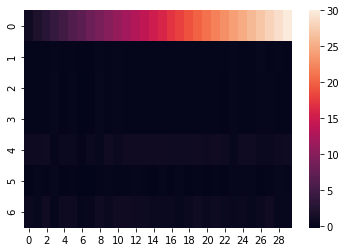

In [ ]:
sn.heatmap([trial_[:],R_v[:],rho_v[:],Pearson_v[:],p_v[:],Spearman_v[:],p_v_spear[:]])

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

clf = linear_model.Lasso(alpha=0.1)
clf.fit(entropy_.reshape(-1, 1),entropy_vector[0].reshape(-1, 1))
Lasso(alpha=0.1)
print(clf.coef_)
print(clf.intercept_)



[-0.]
[2.95525839]


In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
X = entropy_vector
y = entropy_
loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)
LeaveOneOut()
for train_index, test_index in loo.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     print(X_train, X_test, y_train, y_test)

LeaveOneOut()
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] TEST: [0]
[[ 3.26921773  2.64482999  2.10015869 ...  2.63781953  1.8956002
   3.71714783]
 [ 2.64020658  2.59422946  2.73854709 ...  3.51558137  2.89893603
   2.70024824]
 [ 2.58853364  2.36342239  2.25087428 ...  2.38554692  3.04463911
   5.8137455 ]
 ...
 [10.09591484 10.08296299 10.12520695 ... 10.11796188 10.10616207
  10.15120697]
 [10.13318443 10.06011963 10.11641312 ...  3.45025754  2.65389299
   3.44749689]
 [ 3.12785673  2.78935504  3.3682816  ...  2.76870751  1.75358546
   1.35521603]] [[2.69329143 1.51816869 2.07646227 3.14577198 2.97836089 2.86839461
  1.58981359 2.57477212 4.19297361 4.42411137 4.15962648 4.52176666
  3.9643383  2.03907847 2.10484815 1.9921279  2.90663624 2.73706937
  4.19916248 3.05606651 2.35974741 1.83278561 2.68093681 1.97096837
  4.38677263 1.88902187 2.92632389 1.13756084 3.09143353 1.4292357
  2.52713633 3.35645199 3.64369082 2.05541754 2.4

In [ ]:
mn=np.mean(entropy_)
first=entropy_[entropy_<mn]
second=entropy_[entropy_>=mn]



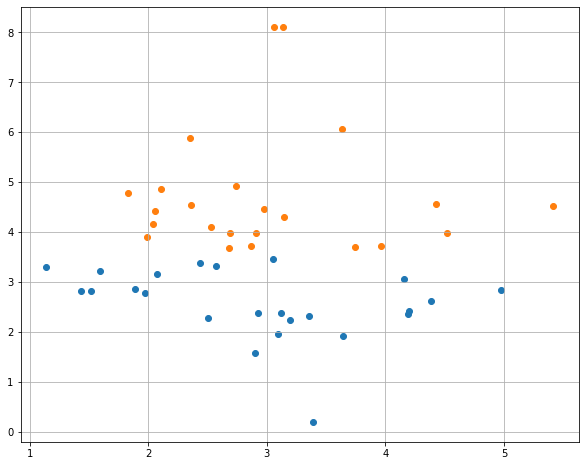

In [ ]:

first_data=entropy_vector[0][entropy_  <mn ]
second_data=entropy_vector[0][entropy_  >=mn ]
plt.figure(figsize=(10,8))
plt.scatter(  first_data , first  )
plt.scatter( second_data, second)
plt.grid()

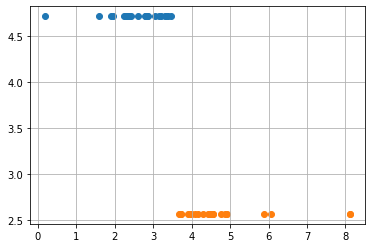

In [ ]:
u=np.ones(first.size) * np.mean(second)
v= np.ones(second.size) * np.mean(first)

plt.scatter(first,u)
plt.scatter(second,v)
plt.grid()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
[[0.]]


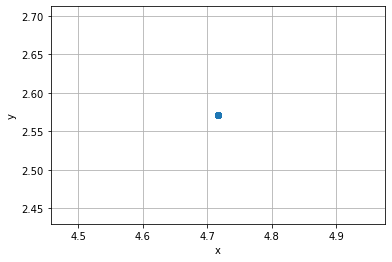

In [ ]:
lin_reg(u[0:23],v)
